# Exploratory Data Analysis for NVIDIA Time‑Series Dataset
This notebook performs a thorough exploratory data analysis (EDA) of a time‑series dataset that combines NVIDIA stock prices with Reddit and news sentiment metrics. The objectives are:
1. Understand the structure and quality of the dataset.
2. Explore temporal patterns in price, volume, and sentiment.
3. Identify relationships between sentiment and market performance.
4. Surface any anomalies, trends, or seasonality that may inform downstream modeling.

In [10]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Stats / TS analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot, autocorrelation_plot

# Config
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
sns.set_style('whitegrid')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [6]:
DATA_PATH = '../../data/merged-data/nvidia-merged.csv'

In [8]:
data = pd.read_csv(DATA_PATH)
print(f'Shape: {data.shape}')
data.head()

Shape: (1651, 16)


,Date,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score
0,2025-01-02,135.9875,138.8672,134.6176,138.2973,"198,247,200.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-03,139.9971,144.8867,139.7171,144.4567,"229,322,500.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-06,148.5763,152.1460,147.8064,149.4162,"265,377,400.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-07,153.0159,153.1159,139.9971,140.1271,"351,782,200.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-08,142.5669,143.9368,137.5474,140.0971,"227,349,900.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1651 non-null   object 
 1   Open               1651 non-null   float64
 2   High               1651 non-null   float64
 3   Low                1651 non-null   float64
 4   Close              1651 non-null   float64
 5   Volume             1651 non-null   float64
 6   author             1566 non-null   object 
 7   score              1566 non-null   float64
 8   subreddit          1566 non-null   object 
 9   tickers_mentioned  1651 non-null   object 
 10  clean_text         1566 non-null   object 
 11  compound           1566 non-null   float64
 12  sentiment          1566 non-null   object 
 13  cleaned_headline   1522 non-null   object 
 14  sentiment_news     1522 non-null   object 
 15  sentiment_score    1522 non-null   float64
dtypes: float64(8), object(8)

None

In [11]:
display(df.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,1651,102,2025-05-30,784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,"1,651.0000",NaN,NaN,NaN,137.8908,5.7911,87.4600,136.0300,138.7200,139.3222,153.0159
High,"1,651.0000",NaN,NaN,NaN,139.0536,5.4684,99.4400,137.2500,139.6200,140.9970,153.1159
Low,"1,651.0000",NaN,NaN,NaN,133.6286,5.4301,86.6200,132.9200,132.9200,136.1325,147.8064
Close,"1,651.0000",NaN,NaN,NaN,135.2062,5.0578,94.3100,134.8100,135.1300,139.0136,149.4162
Volume,"1,651.0000",NaN,NaN,NaN,"330,378,478.9824","41,935,772.7978","132,972,200.0000","304,021,100.0000","333,170,900.0000","369,241,900.0000","818,830,900.0000"
author,1566,55,fountainheadusa,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
score,"1,566.0000",NaN,NaN,NaN,"1,219.4406","3,990.3925",0.0000,24.0000,48.0000,311.0000,"19,694.0000"
subreddit,1566,3,wallstreetbets,720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tickers_mentioned,1651,1,NVDA,1651,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date').set_index('Date')

In [15]:
# Forward fill numeric columns if small gaps, else leave for modeling
data[['Open','High','Low','Close','Volume']] = data[['Open','High','Low','Close','Volume']].ffill()

In [16]:
# Create a daily return column
data['Return'] = data['Close'].pct_change()

In [17]:
missing_after = data.isna().sum().sort_values(ascending=False)
print('Missing after preprocessing:')
display(missing_after[missing_after > 0])

Missing after preprocessing:


cleaned_headline    129
sentiment_news      129
sentiment_score     129
author               85
score                85
subreddit            85
clean_text           85
compound             85
sentiment            85
Return                1
dtype: int64

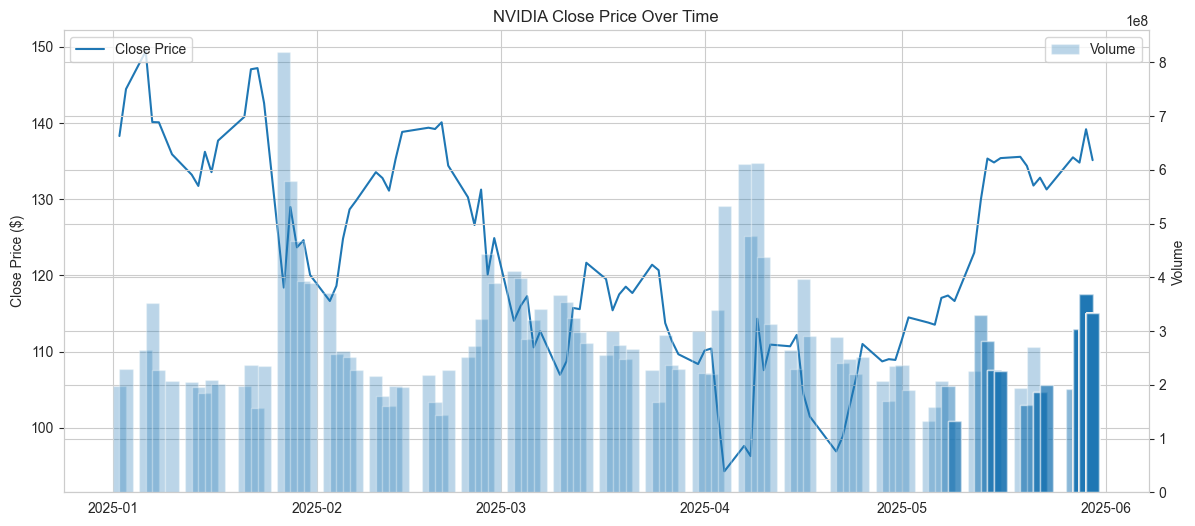

In [20]:
fig, ax1 = plt.subplots(figsize = (14,6))
ax1.plot(data.index, data['Close'], label = 'Close Price')
ax1.set_ylabel('Close Price ($)')
ax1.set_title('NVIDIA Close Price Over Time')
ax1.legend(loc = 'upper left')

# Secondary axis for volume
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha = 0.3, label = 'Volume', width = 2)
ax2.set_ylabel('Volume')
ax2.legend(loc = 'upper right')
plt.show()

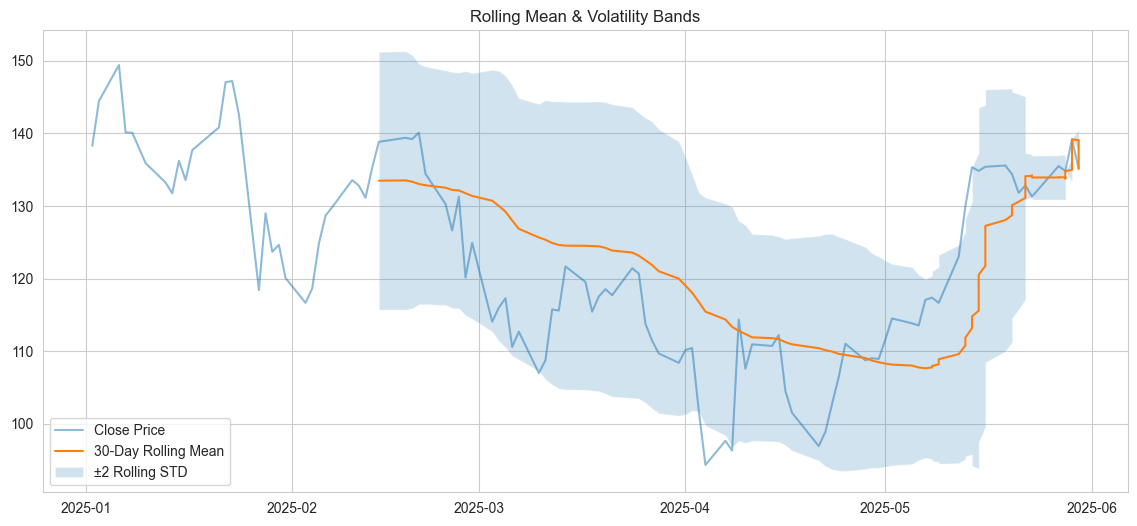

In [21]:
window = 30  # 30 trading days ~ 1.5 months
rolling_mean = data['Close'].rolling(window).mean()
rolling_std = data['Close'].rolling(window).std()

plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(rolling_mean, label=f'{window}-Day Rolling Mean')
plt.fill_between(data.index, rolling_mean - 2*rolling_std, rolling_mean + 2*rolling_std, alpha=0.2, label='±2 Rolling STD')
plt.title('Rolling Mean & Volatility Bands')
plt.legend()
plt.show()

In [24]:
data

,Open,High,Low,Close,Volume,author,score,subreddit,tickers_mentioned,clean_text,compound,sentiment,cleaned_headline,sentiment_news,sentiment_score,Return
Date,,,,,,,,,,,,,,,,
2025-01-02,135.9875,138.8672,134.6176,138.2973,"198,247,200.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,139.9971,144.8867,139.7171,144.4567,"229,322,500.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN,0.0445
2025-01-06,148.5763,152.1460,147.8064,149.4162,"265,377,400.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN,0.0343
2025-01-07,153.0159,153.1159,139.9971,140.1271,"351,782,200.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN,-0.0622
2025-01-08,142.5669,143.9368,137.5474,140.0971,"227,349,900.0000",NaN,NaN,NaN,NVDA,NaN,NaN,NaN,NaN,NaN,NaN,-0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-30,138.7200,139.6200,132.9200,135.1300,"333,170,900.0000",wilbo75771,69.0000,wallstreetbets,NVDA,nvidias ai dominance is solid q1 data center b...,0.8639,positive,nvidia corporation nvda q1 2026 earnings call ...,neutral,0.9156,0.0000
2025-05-30,138.7200,139.6200,132.9200,135.1300,"333,170,900.0000",wilbo75771,69.0000,wallstreetbets,NVDA,nvidias ai dominance is solid q1 data center b...,0.8639,positive,nvidia the ai windfall continues but forward r...,negative,0.8740,0.0000
2025-05-30,138.7200,139.6200,132.9200,135.1300,"333,170,900.0000",wilbo75771,69.0000,wallstreetbets,NVDA,nvidias ai dominance is solid q1 data center b...,0.8639,positive,stocks gain dollar weakens as court battle ove...,negative,0.9226,0.0000


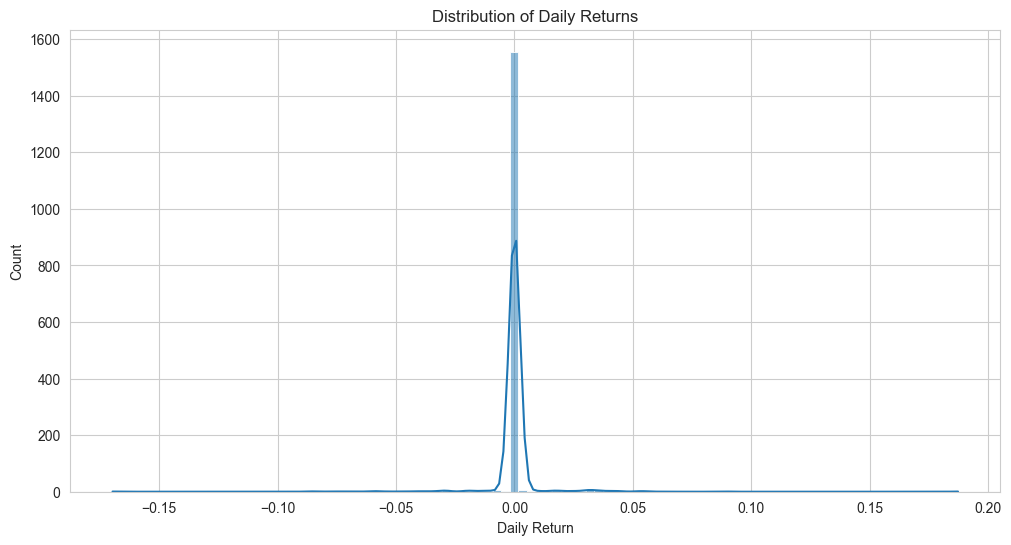

count   1,650.0000
mean        0.0000
std         0.0106
min        -0.1697
1%         -0.0311
5%          0.0000
25%         0.0000
50%         0.0000
75%         0.0000
95%         0.0000
99%         0.0342
max         0.1872
Name: Return, dtype: float64

In [29]:
sns.histplot(data['Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

# Tail analysis
data['Return'].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99])

In [31]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = dict(zip(labels, result[:4]))
    for key, value in out.items():
        print(f'{key}: {value}')
    for key, val in result[4].items():
        print(f'Critical Value {key}: {val}')
    print('---')

adf_test(data['Close'], 'Close Price')
adf_test(data['Return'], 'Return')

Augmented Dickey-Fuller Test: Close Price
ADF Statistic: -4.447334599959219
p-value: 0.0002445241435490698
# Lags Used: 24
Number of Observations Used: 1626
Critical Value 1%: -3.434378077206262
Critical Value 5%: -2.8633191630261203
Critical Value 10%: -2.5677171879165286
---
Augmented Dickey-Fuller Test: Return
ADF Statistic: -7.3134909354912585
p-value: 1.2466047148521673e-10
# Lags Used: 24
Number of Observations Used: 1625
Critical Value 1%: -3.434380559955255
Critical Value 5%: -2.8633202588932547
Critical Value 10%: -2.567717771455621
---


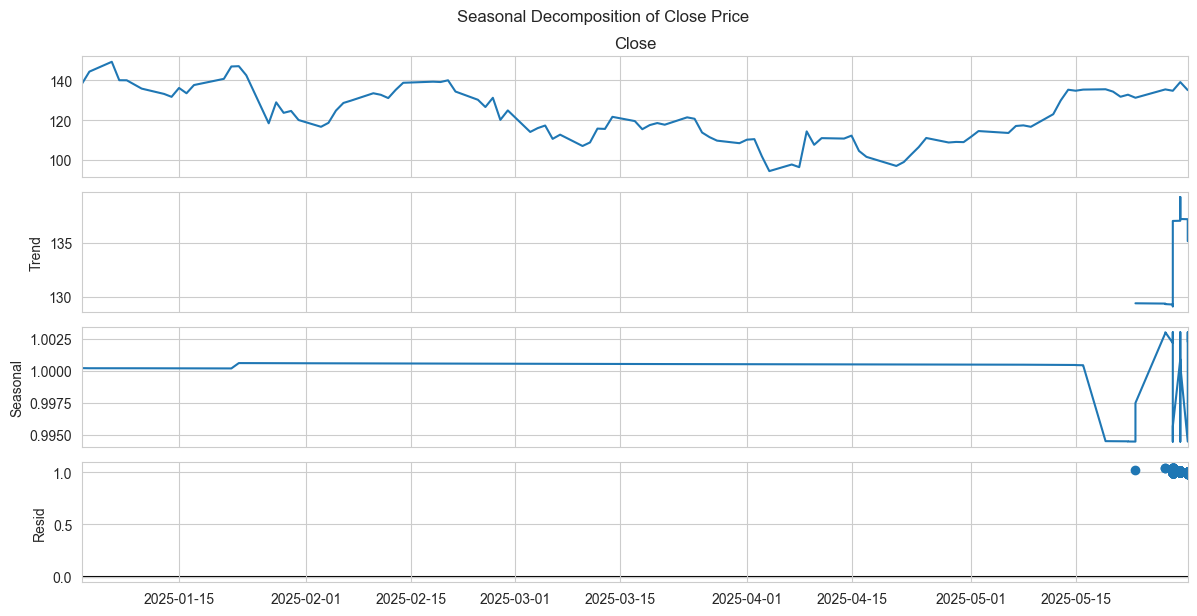

In [32]:
# Decompose with multiplicative model (price often multiplicative)
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=252)  # ~1 year trading days

decomposition.plot()
plt.suptitle('Seasonal Decomposition of Close Price', y=1.02)
plt.show()

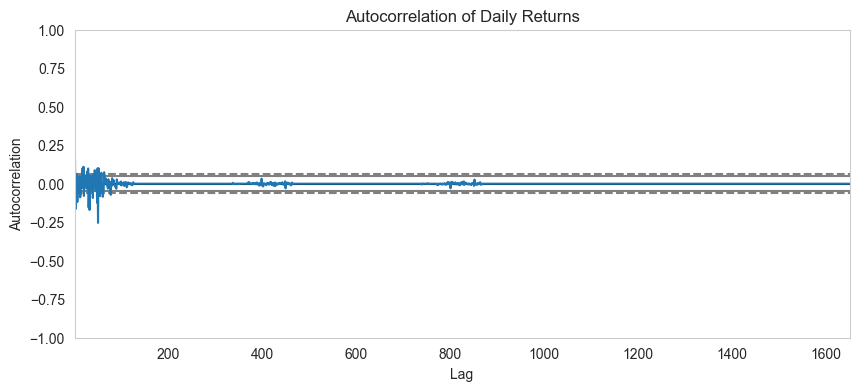

In [33]:
plt.figure(figsize=(10,4))
autocorrelation_plot(data['Return'].dropna())
plt.title('Autocorrelation of Daily Returns')
plt.show()

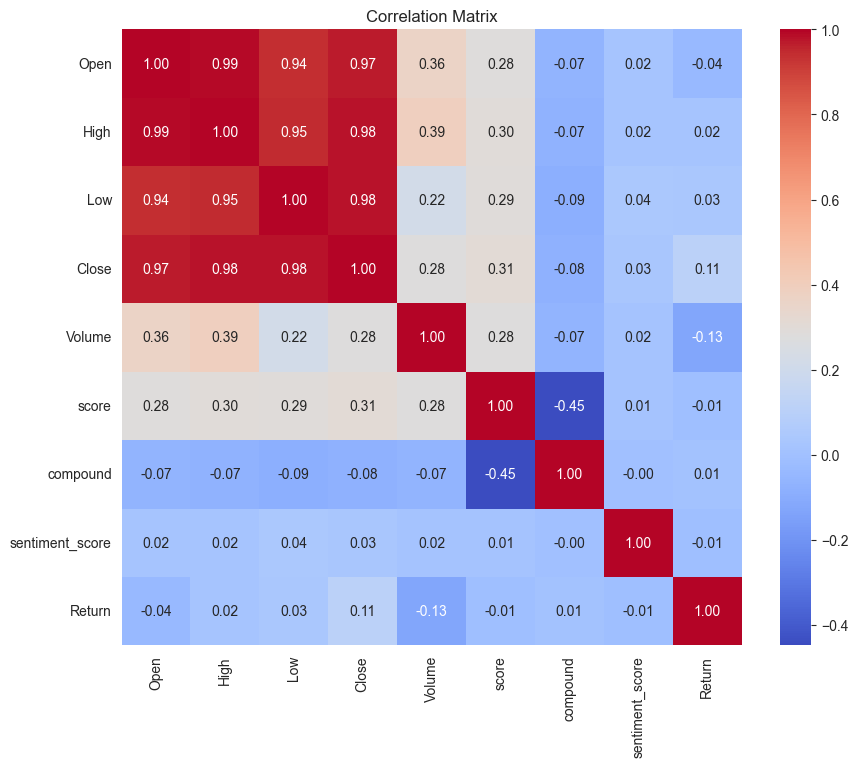

In [34]:
# Select numeric columns for correlation
num_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [36]:
# How many duplicates do I have?
dupes = data.index.duplicated(keep=False).sum()
print(f"Duplicate index rows: {dupes}")

# Quickly inspect a few of them
print(data.index[data.index.duplicated()].unique()[:10])


Duplicate index rows: 1562
DatetimeIndex(['2025-05-08', '2025-05-09', '2025-05-13', '2025-05-14',
               '2025-05-15', '2025-05-16', '2025-05-20', '2025-05-22',
               '2025-05-23', '2025-05-27'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [37]:
data_grouped = (
    data.groupby('Date')
        .agg({'Return': 'mean', 'sentiment_num': 'mean'})
        .dropna()
        .reset_index()
)

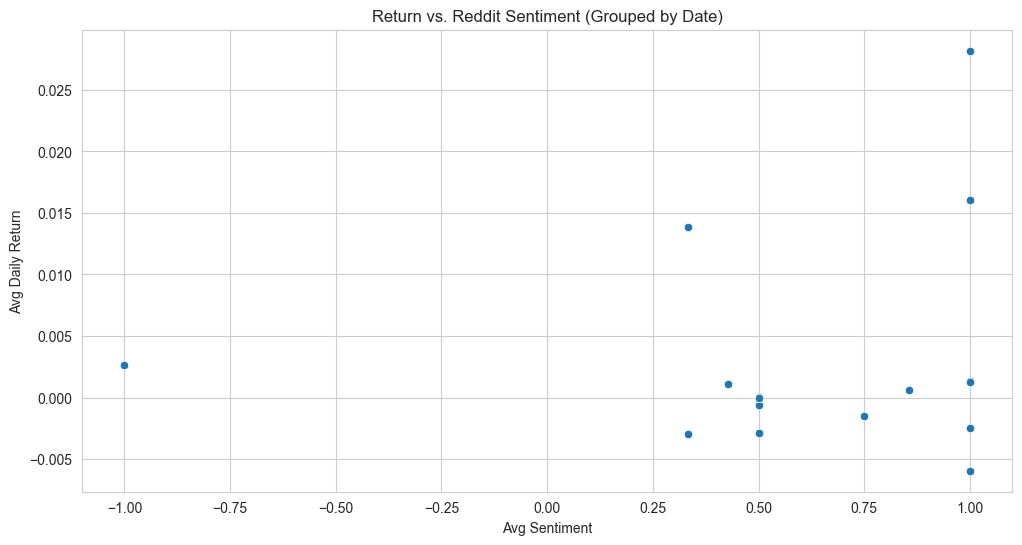

Correlation between Return and Sentiment (by Date): 0.1228


In [38]:
sns.scatterplot(x='sentiment_num', y='Return', data=data_grouped)
plt.title('Return vs. Reddit Sentiment (Grouped by Date)')
plt.xlabel('Avg Sentiment')
plt.ylabel('Avg Daily Return')
plt.show()

corr = data_grouped['Return'].corr(data_grouped['sentiment_num'])
print(f'Correlation between Return and Sentiment (by Date): {corr:.4f}')

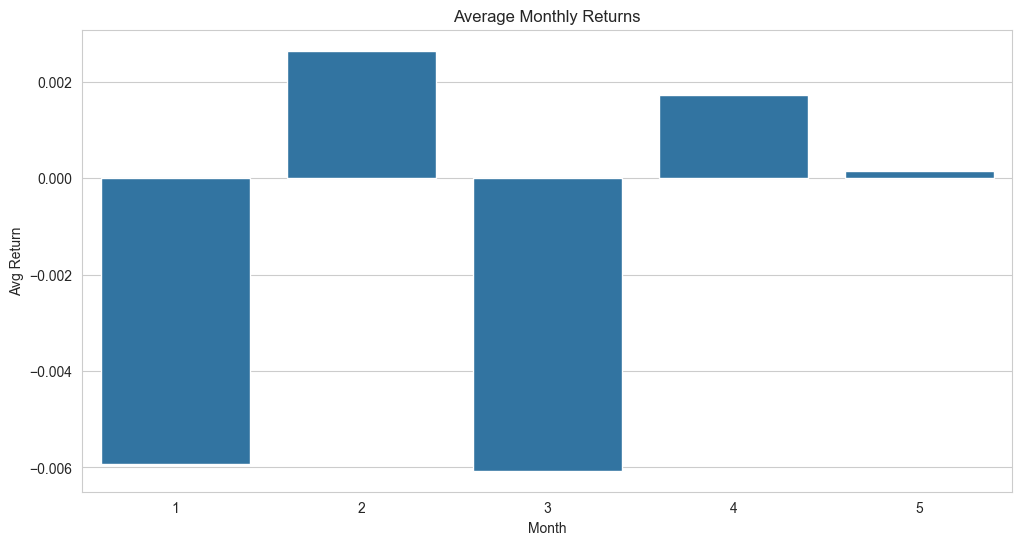

In [39]:
# Monthly seasonality
data['Month'] = data.index.month
monthly_avg = data.groupby('Month')['Return'].mean()

sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Avg Return')
plt.show()

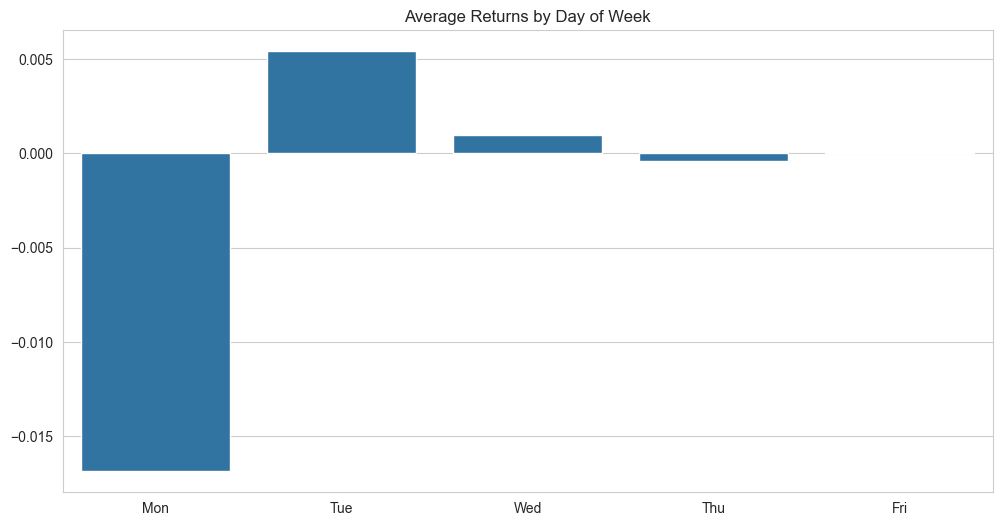

In [40]:
# Day of week effect
data['DayOfWeek'] = data.index.dayofweek  # 0=Monday
dow_avg = data.groupby('DayOfWeek')['Return'].mean()

sns.barplot(x=['Mon','Tue','Wed','Thu','Fri'], y=dow_avg.values)
plt.title('Average Returns by Day of Week')
plt.show()